In [0]:
#Colab stuffs:

#get a fast operator system
!nvidia-smi

#mount google drive
from google.colab import drive
drive.mount('/content/drive')#click on the link it provides and copy and paste that code into the authorization area

#access the OS system to work with current directories:
import os 

Tue Oct 15 17:04:29 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
#imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.despine()
sns.set(rc={'figure.figsize':(15,9)})
%matplotlib inline

In [0]:
df = pd.read_csv('drive/My Drive/Capstone_2/data/one_year.csv', low_memory=False)
#df = pd.read_csv('drive/My Drive/Capstone_2/data/two_year.csv', low_memory=False)

In [0]:
#Correct unit types

from datetime import datetime
cols= ['invdate','duedate','delivery',]
cols2= ['invdate']
def change_date_time(df, cols=None):
  for col in cols:
    df[col] =  pd.to_datetime(df[col], format='%Y-%m-%d')
change_date_time(df, cols) 

In [0]:
#Creating a category column that mimics the companies established categories
df['cat'] = np.where(df.item.str.startswith('CV'), df.item.str[2:],
            np.where(df.item.str.startswith('R'), df.item.str[1:], df.item))

df['cat'] =np.where(df.cat.str.startswith('CVG'), "specialty", 
           np.where(df.cat.str.startswith('G'), "specialty",
           np.where(df.cat.str.startswith('0'), "worked",
           np.where(df.cat.str.startswith('1'), "fruit",
           np.where(df.cat.str.startswith('2'), "greens",
           np.where(df.cat.str.startswith('3'), "veg",
           np.where(df.cat.str.startswith('4'), "tomatoe", 
           np.where(df.cat.str.startswith('5'), "potatoe",
           np.where(df.cat.str.startswith('6'), "mushrooms",
           np.where(df.cat.str.startswith('7'), "dairy_juice",
           np.where(df.cat.str.startswith('8'), "meat",
           np.where(df.cat.str.startswith('9'), "grains", "other"))))))))))))

In [0]:
#drop the specialty and other categories and focus on the core 9 because specialty & other contain a lot of miscellaneous products

df= df[~df.cat.str.contains("other|specialty")]
df.cat.value_counts()

greens         70343
veg            56794
fruit          35364
dairy_juice    11229
mushrooms      11221
tomatoe         9150
potatoe         7012
grains          3374
meat             200
Name: cat, dtype: int64

In [0]:
df.to_csv(r'/content/drive/My Drive/Capstone_2/data/one_year_categories.csv', index= 'invdate', header=True)

In [0]:
#create a pivot table of the categories

df2 = pd.pivot_table(df, values= "ordqty", index= "invdate", columns = "cat", aggfunc=np.sum, fill_value=0)
df2.head()

cat,dairy_juice,fruit,grains,greens,meat,mushrooms,potatoe,tomatoe,veg
invdate,,,,,,,,,
2017-08-23,36.00,66.50,9.0,254.00,0,14.0,18.0,21.00,134.50
2017-08-24,151.00,176.00,8.0,458.66,0,29.0,33.0,54.16,230.50
2017-08-25,505.75,178.12,12.0,407.00,2,47.0,26.0,38.00,233.00
2017-08-26,87.00,88.00,8.0,286.00,0,20.0,19.0,37.00,152.75
2017-08-27,-16.00,-7.00,0.0,-12.00,0,-2.0,0.0,-6.00,-9.00


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Mushrooms Quantities')

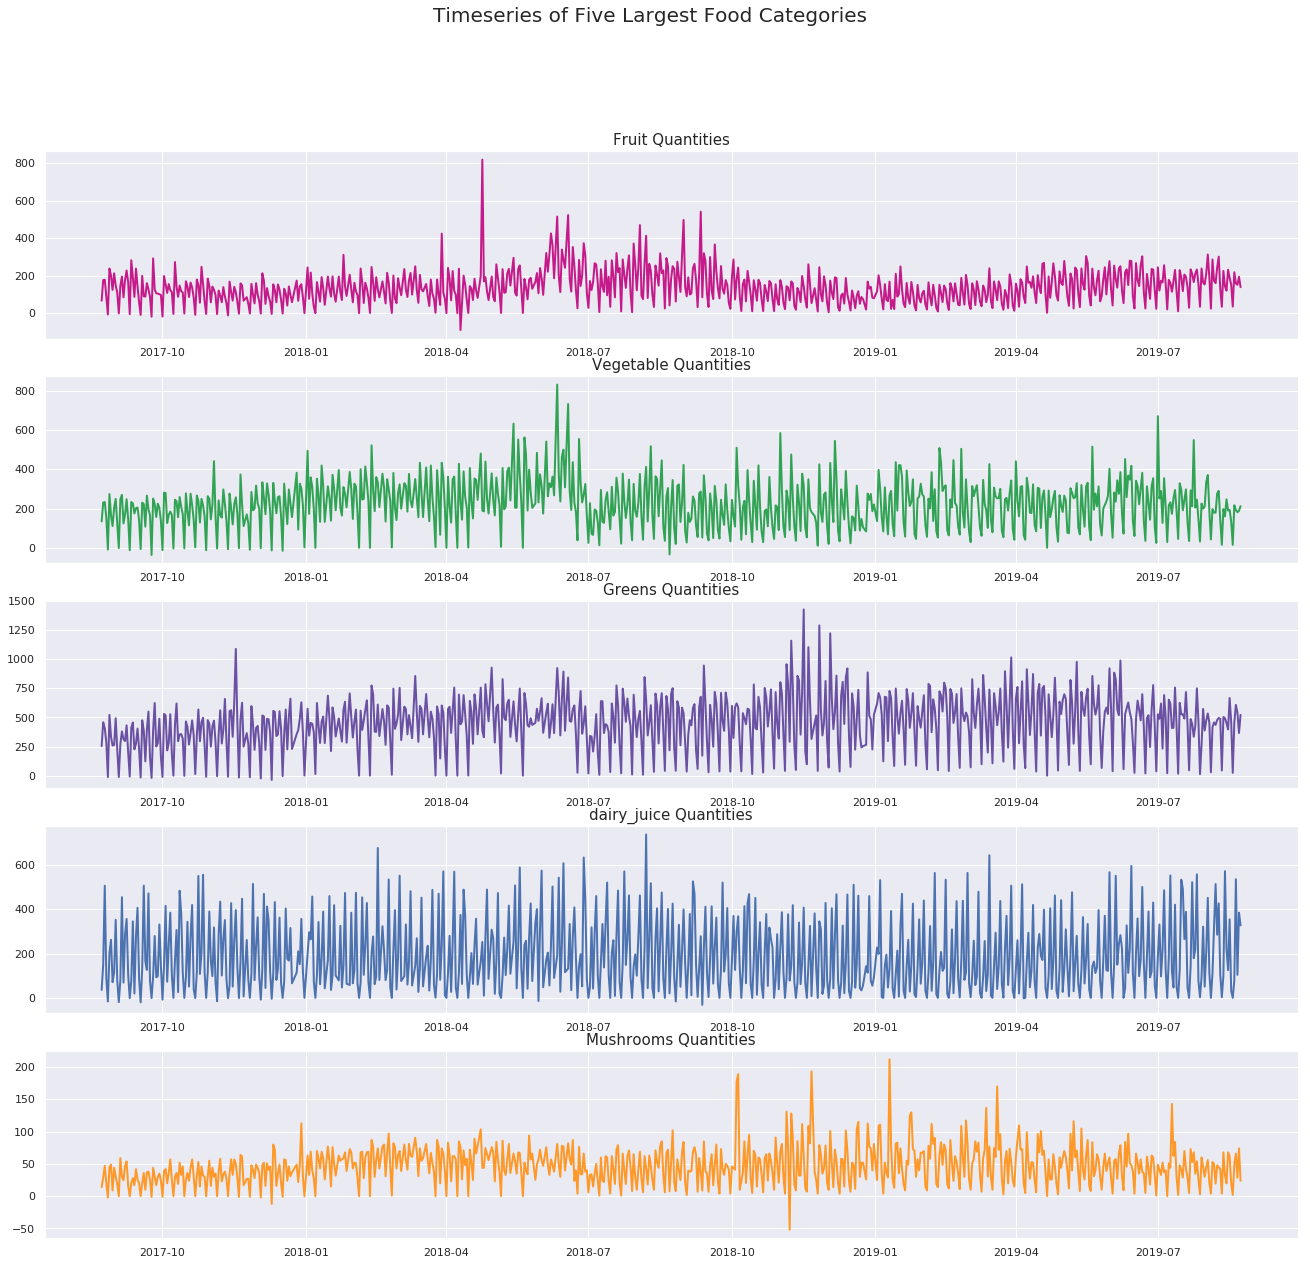

In [0]:
#visualizing categories
fig, axs = plt.subplots(5, figsize=(20,20))
fig.suptitle('Timeseries of Five Largest Food Categories', fontsize= 20)
axs[0].plot(df2.index, df2['fruit'], linewidth= 2, label= 'fruit', color= '#c51b8a')
axs[0].set_title ("Fruit Quantities", fontsize= 15)
axs[1].plot(df2.index, df2['veg'], linewidth= 2, label= 'veg', color = '#31a354')
axs[1].set_title ("Vegetable Quantities", fontsize= 15)
axs[2].plot(df2.index, df2['greens'], linewidth= 2, label= 'greens, herbs, sprouts', color= '#6a51a3')
axs[2].set_title ("Greens Quantities", fontsize= 15)
axs[3].plot(df2.index, df2['dairy_juice'], linewidth= 2, label= 'dairy_juice')
axs[3].set_title ("dairy_juice Quantities", fontsize= 15)
axs[4].plot(df2.index, df2['mushrooms'], linewidth= 2, label= 'mushrooms', color= '#fe9929')
axs[4].set_title ("Mushrooms Quantities", fontsize= 15)

Text(0.5, 1.0, 'Meat Quantities')

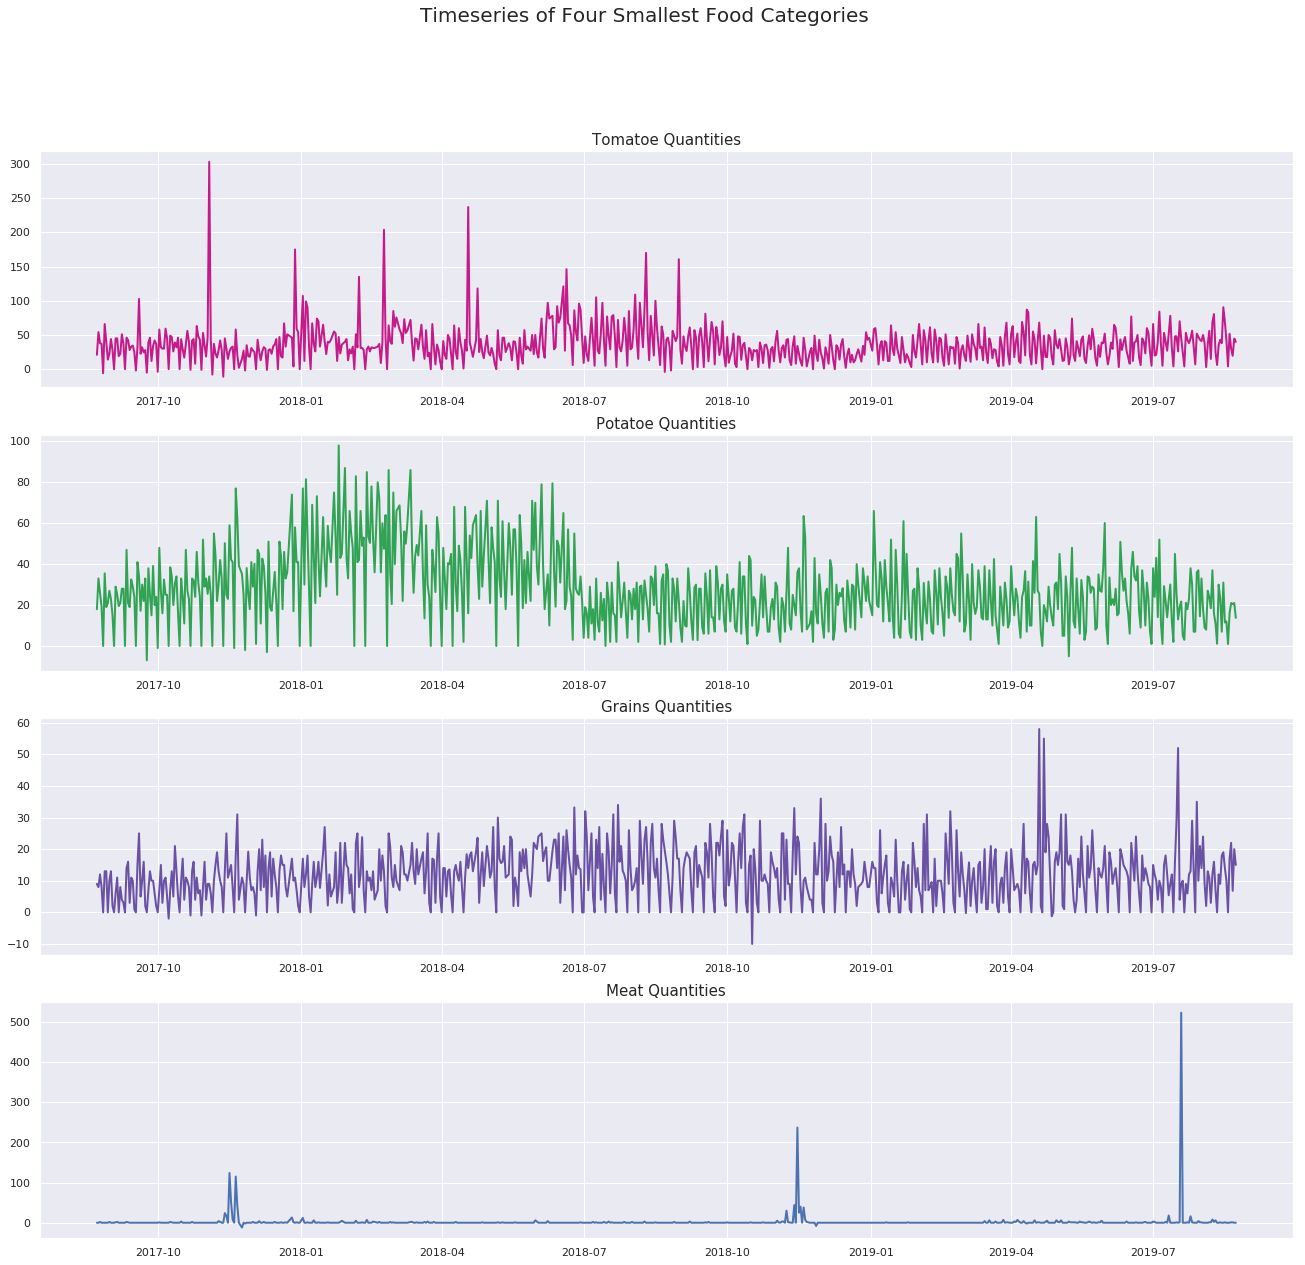

In [0]:
fig, axs = plt.subplots(4, figsize=(20,20))
fig.suptitle('Timeseries of Four Smallest Food Categories', fontsize= 20)
axs[0].plot(df2.index, df2['tomatoe'], linewidth= 2, label= 'tomatoe', color= '#c51b8a')
axs[0].set_title ("Tomatoe Quantities", fontsize= 15)
axs[1].plot(df2.index, df2['potatoe'], linewidth= 2, label= 'potatoe', color = '#31a354')
axs[1].set_title ("Potatoe Quantities", fontsize= 15)
axs[2].plot(df2.index, df2['grains'], linewidth= 2, label= 'grains', color= '#6a51a3')
axs[2].set_title ("Grains Quantities", fontsize= 15)
axs[3].plot(df2.index, df2['meat'], linewidth= 2, label= 'meat')
axs[3].set_title ("Meat Quantities", fontsize= 15)


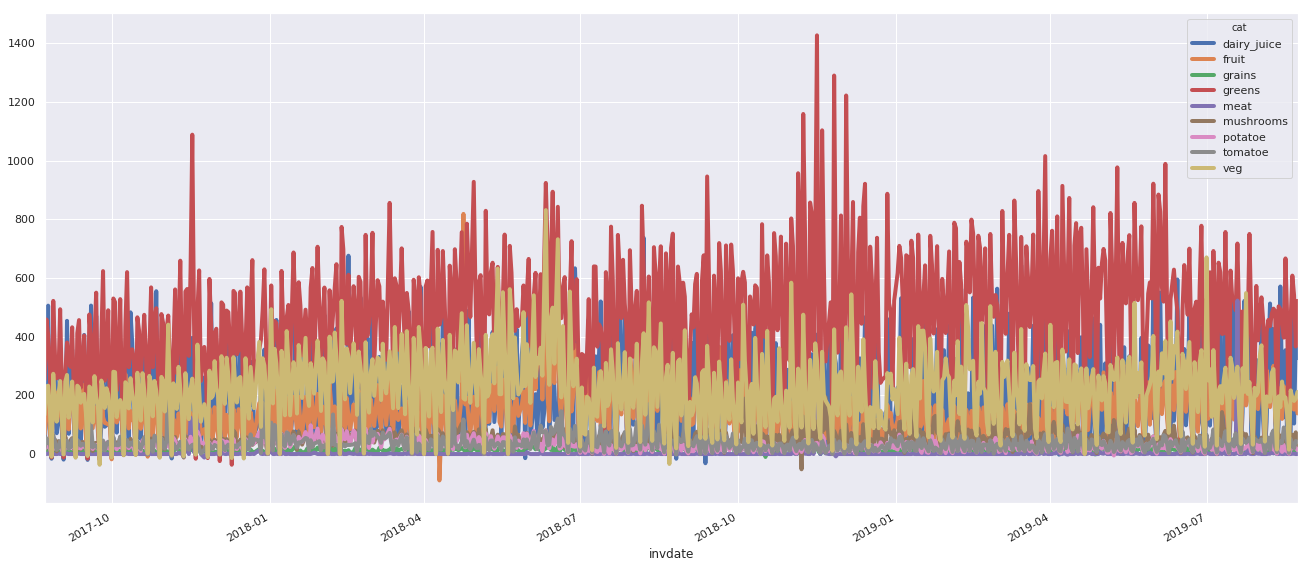

In [0]:
df2.plot(figsize=(20,10), linewidth= 4)

Text(0.5, 1.0, 'Area Plot of the Different Item Categories')

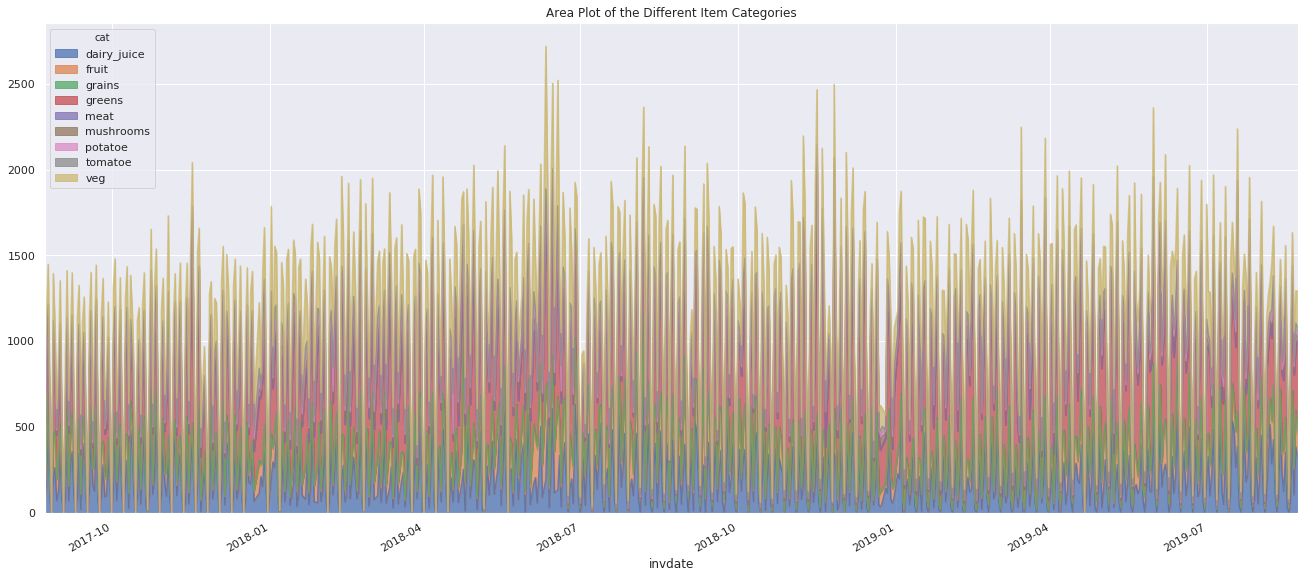

In [0]:
df3 = df2[df2 >= 0]
df3.plot.area(figsize=(20,10), alpha = .75)
plt.title("Area Plot of the Different Item Categories")

In [0]:
#counting negative values
np.sum((df2 < 0).values.ravel())

104

In [0]:
#replacing those negative values
df2[df2 < 0] = np.nan
df2.dropna(inplace=True)

In [0]:
df2.to_csv(r'/content/drive/My Drive/Capstone_2/data/correct_cat_pivot.csv', index= 'invdate', header=True)


In [0]:
df.tail(20)

,invdate,index,invno,item,desc,uom,units,price,totalcost,ordqty,shipqty,diff_quantity,amount,profit,custno,sono_x,sono_y,paid,diff_amt_paid,duedate,days,status,datesold,delivery,route,salesman,priccode,orgprice,firstrun,added,invline,new
209205,2019-08-23,528669,279842,30035C,"Bean, Green Bag 12x12oz Certified Organic",CASE,1.0,31.9,22.00,-1.0,-1.0,0.0,-47.8,-25.8,20-VC,279842,279842,0.0,-47.8,2019-09-13,21.0,O,2019-08-23,2019-08-23,D3,NC,PL2I,0.0,0.0,8/23/2019,3,cool
209206,2019-08-23,528670,279843,20221C,"Salad, Baby Spinach, Bulk 2lb, Certified Organic",CASE,1.0,11.0,8.00,-4.0,-4.0,0.0,-44.0,-12.0,30-SA,279843,279843,0.0,-44.0,2019-09-06,14.0,O,2019-08-23,2019-08-23,DG1,BC,PL6,0.0,0.0,8/23/2019,1,cool
209207,2019-08-23,528671,279844,40043,"Tomato, Clamshell, Golden Grape, 12x1 pt, Cert...",CASE,1.0,28.9,20.00,-1.0,-1.0,0.0,-28.9,-8.9,20-VC,279844,279844,0.0,-28.9,2019-09-13,21.0,O,2019-08-23,2019-08-23,D1,NC,PL2I,0.0,0.0,8/23/2019,1,cool
209208,2019-08-23,528672,279845,20223A,"Salad, Clam, 6x10oz, OGGirl, Arugula",CASE,1.0,23.5,19.70,-2.0,-2.0,0.0,-170.6,-131.2,30-ALP,279845,279845,0.0,-170.6,2019-09-22,30.0,O,2019-08-23,2019-08-23,SL2,AR,PL6,0.0,0.0,8/23/2019,1,cool
209209,2019-08-23,528673,279845,20225,"Salad, Clam, 6x10oz,OG Girl Spring Mix, Cert. OG",CASE,1.0,30.9,19.95,-4.0,-4.0,0.0,-170.6,-90.8,30-ALP,279845,279845,0.0,-170.6,2019-09-22,30.0,O,2019-08-23,2019-08-23,SL2,AR,PL6,0.0,0.0,8/23/2019,2,cool
209210,2019-08-23,528674,279846,30168,"Carrot, Rainbow, tableBulk, 25lb, Cert. OG",CASE,1.0,33.9,22.00,-1.0,-1.0,0.0,-33.9,-11.9,30-KT,279846,279846,0.0,-33.9,2019-09-22,30.0,O,2019-08-23,2019-08-23,BG1,AR,PL6,0.0,0.0,8/23/2019,1,cool
209211,2019-08-23,528675,279847,40049B,"Tomato, Sweet 100 12xHalf Pint, Cer",CASE,1.0,31.9,22.00,-1.0,-1.0,0.0,-31.9,-9.9,20-ALF,279847,279847,0.0,-31.9,2019-09-13,21.0,O,2019-08-23,2019-08-23,BG1,NC,PL2I,0.0,0.0,8/23/2019,1,cool
209212,2019-08-23,528676,279848,40010,"Tomato, 1 Layer 11lb LOCAL, Certifi",CASE,1.0,20.9,14.00,-2.0,-2.0,0.0,-72.7,-44.7,20-ALF,279848,279848,0.0,-72.7,2019-09-13,21.0,O,2019-08-23,2019-08-23,BG1,NC,PL2I,0.0,0.0,8/23/2019,1,cool
209213,2019-08-23,528677,279848,60028,"Mushroom, Porcini, 1 lb., Wild Craf",1LB,1.0,30.9,21.00,-1.0,-1.0,0.0,-72.7,-51.7,20-ALF,279848,279848,0.0,-72.7,2019-09-13,21.0,O,2019-08-23,2019-08-23,BG1,NC,PL2I,0.0,0.0,8/23/2019,2,cool
209214,2019-08-23,528678,279849,30239,"Cucumber, English HH, Cert. Org.",CASE,1.0,27.9,18.00,-1.0,-1.0,0.0,-27.9,-9.9,30-KTD,279849,279849,0.0,-27.9,2019-09-22,30.0,O,2019-08-23,2019-08-23,D2,AR,PL6,0.0,0.0,8/23/2019,1,cool


Next to create a pivot table of some top ten sellers to check the models against

In [0]:
df['new'] =np.where(df.item == '710063', "almond milk", 
                    
           np.where(df.item == '30089', "broccoli", 
           np.where(df.item == '30089A', "broccoli",
                    
           np.where(df.item == '30168', "rainbowcarrot",
                    
           np.where(df.item == '30298A', 'jicama',
                    
           np.where(df.item == '20300', "garlic_peeled_5lb",
                    
           np.where(df.item == '30081', "red_bagged_beets_25lb",
                    
           np.where(df.item == '30129', "cabbage,green", 
           np.where(df.item == '30129A', "cabbage,green",
           
           np.where(df.item == '20215A', "arugula", 
                    
           np.where(df.item == '30233', "cucumber", 
           np.where(df.item == '30233-A', "cucumber",
                    
           np.where(df.item == '30323', "leeks_20lb",
           
           np.where(df.item == '30541', "jalapeno",
           np.where(df.item == '30541A', "jalapeno",
                    
           np.where(df.item == '40083M', "roma_tomato",
                    
           np.where(df.item == '20335G', "mint","cool")))))))))))))))))
          

In [0]:
df.new.value_counts()

cool                     199112
arugula                    2101
mint                       1438
red_bagged_beets_25lb      1368
garlic_peeled_5lb          1227
broccoli                   1081
jalapeno                    955
jicama                      641
leeks_20lb                  619
rainbowcarrot               448
almond milk                 158
cabbage,green                64
cucumber                     13
Name: new, dtype: int64

In [0]:
indv_items= df.copy()
indv_items[indv_items == "cool"] = np.nan
indv_items.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
indv_items.new.value_counts()

arugula                  2075
mint                     1384
red_bagged_beets_25lb    1330
garlic_peeled_5lb        1216
broccoli                 1061
jalapeno                  930
jicama                    624
leeks_20lb                602
rainbowcarrot             444
almond milk               154
cabbage,green              61
cucumber                   12
Name: new, dtype: int64

In [0]:
#create a pivot table of the ten items

df_indv = pd.pivot_table(indv_items, values= "ordqty", index= "invdate", columns = "new", aggfunc=np.sum, fill_value=0)
df_indv.head()

new,almond milk,arugula,broccoli,"cabbage,green",cucumber,garlic_peeled_5lb,jalapeno,jicama,leeks_20lb,mint,rainbowcarrot,red_bagged_beets_25lb
invdate,,,,,,,,,,,,
2018-08-23,4.0,11.0,7.0,0,0,6.0,7.0,6.0,3.0,61.0,2,4.0
2018-08-24,0.0,20.0,10.0,0,1,7.0,5.0,8.0,1.0,36.0,3,3.0
2018-08-25,0.0,20.0,1.0,0,0,2.0,0.0,0.0,1.0,24.0,1,2.0
2018-08-27,0.0,22.0,6.0,0,7,7.0,8.0,7.0,2.0,36.0,1,5.0
2018-08-28,4.0,19.0,4.0,0,4,6.0,2.0,3.0,1.0,25.0,26,3.0


In [0]:
df_indv.to_csv(r'/content/drive/My Drive/Capstone_2/data/single_items.csv', index= 'invdate', header=True)
